# Dataset 

In this notebook, data overview is provided and augmentations are tested.

In [1]:
import os
import sys

In [2]:
import albumentations as albu
import matplotlib.pyplot as plt
from omegaconf import OmegaConf, DictConfig
from pathlib import Path

In [3]:
def clean_show(ax):
    "Show plt figure without axes in tight layout"
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout()
    plt.show()

Change working directory to the project directory

In [4]:
os.chdir('..')
os.getcwd()

'/var/storage/test-task'

Install required packages in the container and import our modules

In [ ]:
!pip install -r requirements.txt

In [6]:
sys.path.append('modules')
from importlib import reload 
import dataset

Load dataset configuration

In [7]:
cfg = OmegaConf.load('config/data/tinyimagenet.yaml')
print(cfg.pretty())

data:
  classes: 200
  name: tinyimagenet
  root: data/tiny-imagenet-200
  test: test
  train: train
  train_labels: words.txt
  val: val
  val_labels: val_annotations.txt



Load and preview datasets

In [8]:
data_root = Path(cfg.data.root)
train_path = data_root / cfg.data.train
val_path = data_root / cfg.data.val

train_dataset = dataset.TinyImagenetDataset(train_path, cfg, None)
val_dataset = dataset.TinyImagenetDataset(val_path, cfg, None)

In [9]:
def show_examples(dataset, n_examples=10, s=2):
    fig, axes = plt.subplots(ncols=n_examples, figsize=(s*n_examples, s))
    for i, (ax, item) in enumerate(zip(axes, dataset)):
        ax.imshow(item.image)
        ax.set_title(item.id)
        ax.set_xlabel(item.label)
    clean_show(axes)

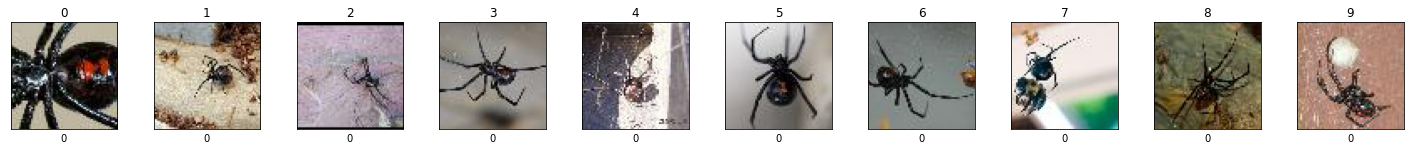

In [10]:
show_examples(train_dataset)

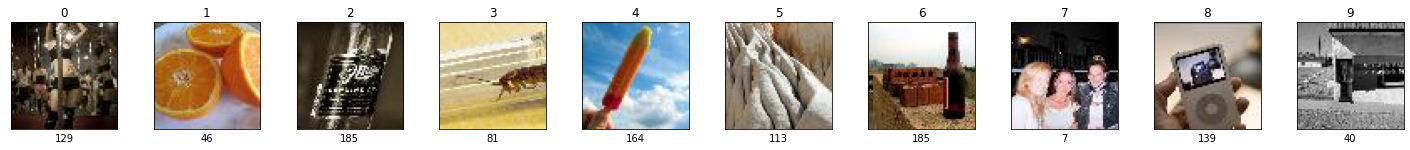

In [11]:
show_examples(val_dataset)

# Augmentation

In [12]:
albu_transform = albu.load('config/augmentation/default.yaml', data_format='yaml')
albu_transform

Compose([
  RandomRotate90(always_apply=False, p=0.5),
  HorizontalFlip(always_apply=False, p=0.5),
  Transpose(always_apply=False, p=0.5),
  RandomScale(always_apply=False, p=0.5, interpolation=1, scale_limit=(0.8999999999999999, 1.08)),
  RandomCrop(always_apply=False, p=1.0, height=56, width=56),
  RandomGamma(always_apply=False, p=0.5, gamma_limit=(80, 120), eps=None),
  RandomContrast(always_apply=False, p=0.5, limit=(-0.2, 0.2)),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [13]:
train_dataset = dataset.TinyImagenetDataset(train_path, cfg, albu_transform)

In [14]:
def show_augmentation(dataset, item=0, n_examples=10, s=2):
    fig, axes = plt.subplots(ncols=n_examples, figsize=(s*n_examples, s))
    for i, ax in enumerate(axes):
        ax.imshow(dataset[item].image)
    clean_show(axes)

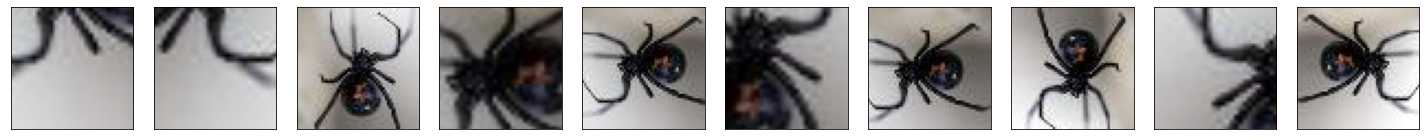

In [15]:
show_augmentation(train_dataset, item=5)

We can experiment with other augmentations and save new config like this:

In [16]:
albu.save(albu_transform, 'config/augmentation/default.yaml', data_format='yaml')